In [1]:
!git clone https://github.com/d-t-n/quality-inspection-ai-cv-deep-learning/

Cloning into 'quality-inspection-ai-cv-deep-learning'...
remote: Enumerating objects: 8700, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 8700 (delta 56), reused 66 (delta 26), pack-reused 8600 (from 1)
Receiving objects: 100% (8700/8700), 100.28 MiB | 45.70 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [2]:
%cd quality-inspection-ai-cv-deep-learning

/kaggle/working/quality-inspection-ai-cv-deep-learning


In [3]:
!kaggle datasets download -d ravirajsinh45/real-life-industrial-dataset-of-casting-product

Dataset URL: https://www.kaggle.com/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 90%|███████████████████████████████████▉    | 90.0M/100M [00:00<00:00, 129MB/s]
100%|█████████████████████████████████████████| 100M/100M [00:00<00:00, 116MB/s]


In [4]:
!unzip real-life-industrial-dataset-of-casting-product.zip -d casting_data/

Archive:  real-life-industrial-dataset-of-casting-product.zip
  inflating: casting_data/casting_512x512/casting_512x512/def_front/cast_def_0_0.jpeg  
  inflating: casting_data/casting_512x512/casting_512x512/def_front/cast_def_0_100.jpeg  
  inflating: casting_data/casting_512x512/casting_512x512/def_front/cast_def_0_1015.jpeg  
  inflating: casting_data/casting_512x512/casting_512x512/def_front/cast_def_0_102.jpeg  
  inflating: casting_data/casting_512x512/casting_512x512/def_front/cast_def_0_1046.jpeg  
  inflating: casting_data/casting_512x512/casting_512x512/def_front/cast_def_0_1053.jpeg  
  inflating: casting_data/casting_512x512/casting_512x512/def_front/cast_def_0_1055.jpeg  
  inflating: casting_data/casting_512x512/casting_512x512/def_front/cast_def_0_1077.jpeg  
  inflating: casting_data/casting_512x512/casting_512x512/def_front/cast_def_0_1087.jpeg  
  inflating: casting_data/casting_512x512/casting_512x512/def_front/cast_def_0_1091.jpeg  
  inflating: casting_data/casting

In [42]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.preprocessing import image 
from keras.models import Sequential
from sklearn import metrics
import keras
from keras.preprocessing import image
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam
from keras.applications import InceptionResNetV2  
import datetime

In [6]:
# defining dir variables 
root_dir = 'archive/casting_data/casting_data/'
train_defective = root_dir + 'train/def_front/'
train_ok = root_dir + 'train/ok_front/'

test_defective = root_dir + 'test/def_front/'
test_ok = root_dir + 'test/ok_front/'

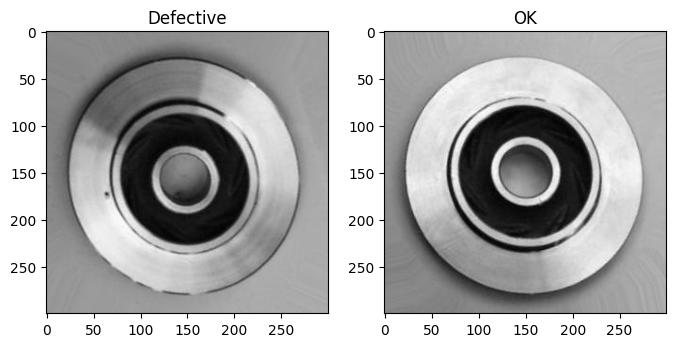

In [7]:
# Ploting images

fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].imshow(plt.imread(train_defective+os.listdir(train_defective)[0]))
axes[1].imshow(plt.imread(train_ok+os.listdir(train_ok)[0]))
axes[0].set_title('Defective')
axes[1].set_title('OK')
plt.show()

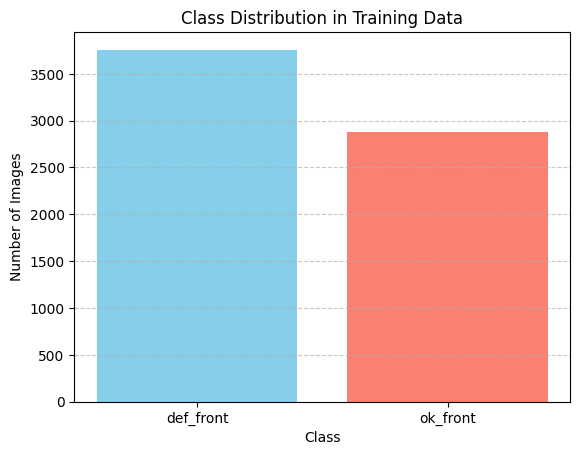

In [104]:
import matplotlib.pyplot as plt
import numpy as np

class_counts = np.bincount(train_data.classes)
class_labels = list(train_data.class_indices.keys())

plt.bar(class_labels, class_counts, color=['skyblue', 'salmon'])
plt.title("Class Distribution in Training Data")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

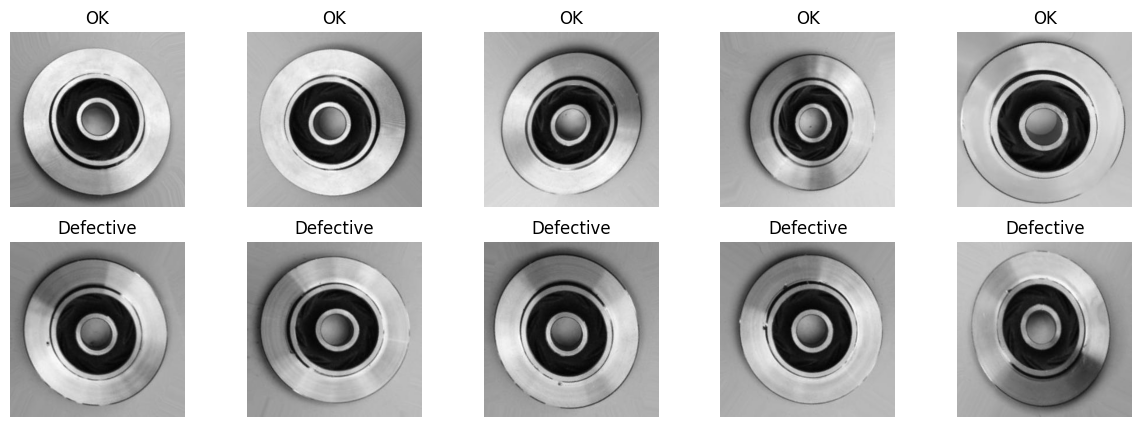

In [8]:
num_images = 5

fig, axs = plt.subplots(nrows=2, ncols=num_images, figsize=(15,5))

# ok images
for i, filename in enumerate(os.listdir(train_ok)[:num_images]):
    img = plt.imread(train_ok + filename)
    axs[0,i].imshow(img)
    axs[0,i].set_title('OK')
    axs[0,i].axis('off')

# defective images
for i, filename in enumerate(os.listdir(train_defective)[:num_images]):
    img = plt.imread(train_defective + filename)
    axs[1,i].imshow(img)
    axs[1,i].set_title('Defective')
    axs[1,i].axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.2)

# show the plot
plt.show()

# EDA

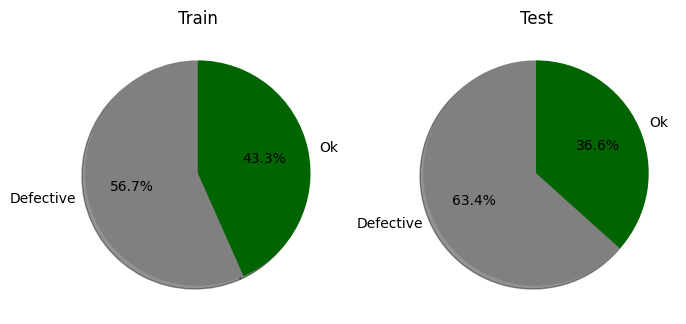

 Defective Training Images 	: 3758
 Ok Training Images 		: 2875

 Defective Testing Images 	: 453
 Ok Testing Images 		: 262


In [9]:
x_train = np.array([len(os.listdir(train_defective)),len(os.listdir(train_ok))])
x_test = np.array([len(os.listdir(test_defective)),len(os.listdir(test_ok))])
label = ['Defective','Ok']
colors = ['grey', 'darkgreen']
  
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(x_train, labels=label, autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
axes[1].pie(x_test, labels=label, autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

print(' Defective Training Images \t: ' + str(len(os.listdir(train_defective))))
print(' Ok Training Images \t\t: ' + str(len(os.listdir(train_ok))))
print()
print(' Defective Testing Images \t: ' + str(len(os.listdir(test_defective))))
print(' Ok Testing Images \t\t: ' + str(len(os.listdir(test_ok))))

In [10]:

# Using IDG to load images from directory
train_idg = ImageDataGenerator(rescale=1./255, validation_split=0.3) # 30 percent validation split for taining 
test_idg = ImageDataGenerator(rescale=1./255)

# Specify parameters/arguments for data generation
img_size = (300, 300)
batch_size = 64

arg_train = {'target_size': img_size,
             'color_mode': 'rgb',
             'class_mode': 'binary',
             'batch_size': batch_size}
arg_test = {'target_size': img_size,
            'color_mode': 'rgb',
            'class_mode': 'binary',
            'batch_size': batch_size,
            'shuffle': False}

train = train_idg.flow_from_directory(directory=root_dir+'train/', subset='training', **arg_train)
valid = train_idg.flow_from_directory(directory=root_dir+'train/', subset='validation', **arg_train)
test  = test_idg.flow_from_directory(directory=root_dir+'test/', **arg_test)

Found 4644 images belonging to 2 classes.
Found 1989 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


## Xception

In [11]:
from tensorflow.keras.applications import Xception
xcept = Xception(input_shape = (300, 300, 3), include_top = False, weights = 'imagenet')

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [12]:
import os
import numpy as np
import pandas as pd
import keras
from keras.layers import Conv2D, MaxPool2D,Dropout,Flatten,Dense
from keras.preprocessing import image 
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import models
import datetime

for layer in xcept.layers:
    layer.trainable = False

cnn = keras.Sequential([
    xcept,
    keras.layers.Flatten(),
    keras.layers.Dense(units=256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1, activation="sigmoid"),
])

cnn.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 10, 10, 2048)        │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 204800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      52,429,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,290,793 (279.58 MB)

 Trainable params: 52,429,313 (200.00 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [13]:
history = cnn.fit(
    train,
    validation_data=valid,
    epochs=20,
    steps_per_epoch=20,
    verbose = 1
    )

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.5787 - loss: 17.3171 - val_accuracy: 0.9311 - val_loss: 0.3153
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9214 - loss: 0.4195 - val_accuracy: 0.9593 - val_loss: 0.2252
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9666 - loss: 0.1363 - val_accuracy: 0.9799 - val_loss: 0.0564
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9851 - loss: 0.0364 - val_accuracy: 0.9910 - val_loss: 0.0367
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9940 - loss: 0.0237 - val_accuracy: 0.9844 - val_loss: 0.0374
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9939 - loss: 0.0186 - val_accuracy: 0.9910 - val_loss: 0.0292
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9897 - loss: 0.0261 - val_accuracy: 0.9930 - val_loss: 0.0319
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9991 - loss: 0.0040 - val_accuracy: 0.9925 - val_loss

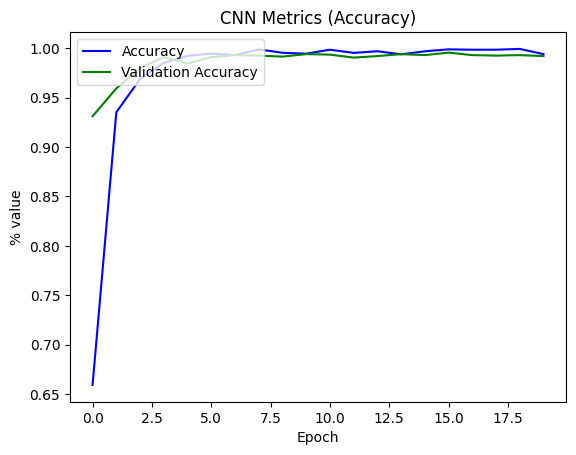

In [14]:
plt.plot(history.history['accuracy'], color='blue', label='Accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.title('CNN Metrics (Accuracy)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

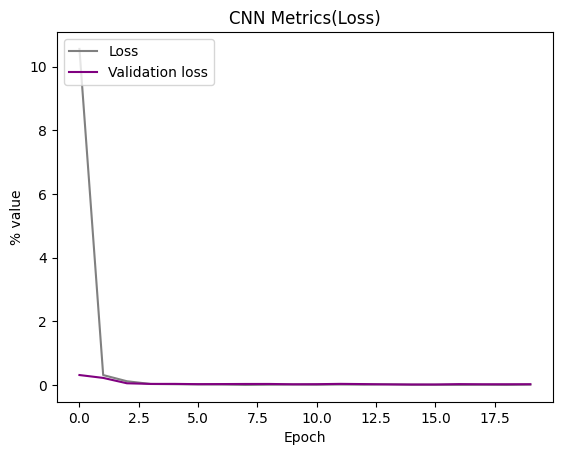

In [15]:
plt.plot(history.history['loss'], color='grey', label='Loss')
plt.plot(history.history['val_loss'], color='purple', label='Validation loss')
plt.title('CNN Metrics(Loss)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [16]:
y_pred = cnn.predict(test)
y_pred = (y_pred >= 0.5).reshape(-1,)

12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step 


In [17]:
y_actual = test.classes[test.index_array]

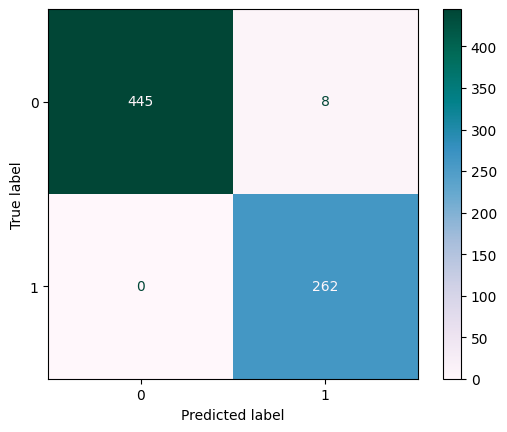

In [18]:
cm = metrics.confusion_matrix(y_actual, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='PuBuGn')
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9823    0.9911       453
           1     0.9704    1.0000    0.9850       262

    accuracy                         0.9888       715
   macro avg     0.9852    0.9912    0.9880       715
weighted avg     0.9891    0.9888    0.9888       715



In [52]:
import os

# See current working directory
print("Current directory:", os.getcwd())

# List the contents
print("Contents:")
print(os.listdir())


Current directory: /kaggle/working/quality-inspection-ai-cv-deep-learning
Contents:
['Model-General-QC-portu-Integrated.ipynb', 'README.md', '.gitattributes', '.git', 'Model2-Xception-QC.ipynb', 'real-life-industrial-dataset-of-casting-product.zip', 'casting_data', 'Model3-InceptionResNetv2-QC.ipynb', 'Model2-Xception-QC-categorical.ipynb', '.Rhistory', 'archive']


In [53]:
print(os.listdir('casting_data'))

['casting_data', 'casting_512x512']


In [55]:
import os

print(os.listdir('casting_data/casting_data'))
print(os.listdir('casting_data/casting_data/casting_data'))


['casting_data']
['train', 'test']


In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'casting_data/casting_data/casting_data/train'
valid_dir = 'casting_data/casting_data/casting_data/test'

train = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),   
    batch_size=32,
    class_mode='binary'
)

valid = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [57]:
from keras.applications import InceptionResNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

# Load InceptionResNetV2 base model
IncResNV2 = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in IncResNV2.layers:
    layer.trainable = False

# Create CNN model
cnnx = keras.Sequential([
    IncResNV2,
    keras.layers.Flatten(),
    keras.layers.Dense(units=256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1, activation="sigmoid")  
])

cnnx.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

print(type(cnn))  


<class 'keras.src.models.sequential.Sequential'>


In [58]:
history = cnnx.fit(
    train,
    steps_per_epoch=len(train),
    validation_data=valid,
    validation_steps=len(valid),
    epochs=20
)

Epoch 1/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 90s 294ms/step - accuracy: 0.8621 - loss: 3.6308 - val_accuracy: 0.9063 - val_loss: 0.2652
Epoch 2/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 36s 173ms/step - accuracy: 0.9761 - loss: 0.0728 - val_accuracy: 0.9930 - val_loss: 0.0192
Epoch 4/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 133us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 36s 170ms/step - accuracy: 0.9816 - loss: 0.0591 - val_accuracy: 0.9944 - val_loss: 0.0294
Epoch 6/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 144us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 35s 168ms/step - accuracy: 0.9912 - loss: 0.0250 - val_accuracy: 0.9944 - val_loss: 0.0152
Epoch 8/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 129us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 36s 171ms/step - accuracy: 0.9909 - loss: 0.0243 - v

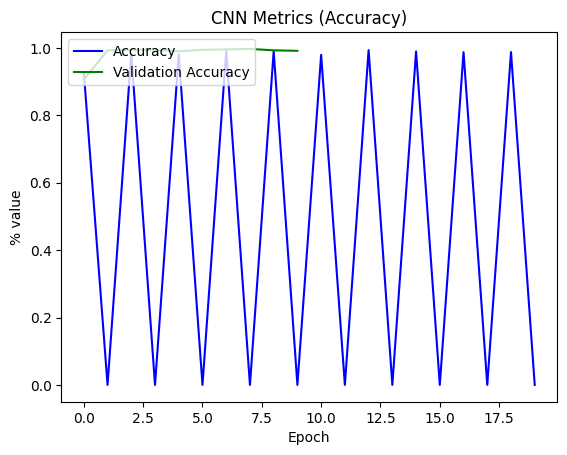

In [59]:
plt.plot(history.history['accuracy'], color='blue', label='Accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.title('CNN Metrics (Accuracy)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

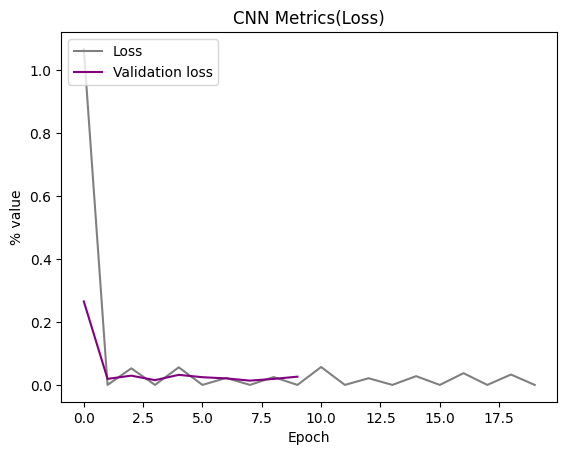

In [60]:
plt.plot(history.history['loss'], color='grey', label='Loss')
plt.plot(history.history['val_loss'], color='purple', label='Validation loss')
plt.title('CNN Metrics(Loss)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [65]:
# Create a new test generator with correct target size
test_datagen = ImageDataGenerator(rescale=1./255)

test = test_datagen.flow_from_directory(
    'casting_data/casting_data/casting_data/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False 
)

Found 715 images belonging to 2 classes.


In [66]:
y_pred = cnnx.predict(test)
y_pred = (y_pred >= 0.5).reshape(-1,)

23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 558ms/step


In [67]:
y_actual = test.classes[test.index_array]

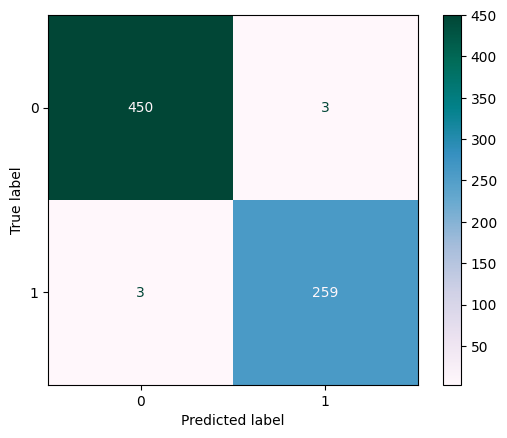

In [68]:
cm = metrics.confusion_matrix(y_actual, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='PuBuGn')
plt.show()

In [69]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9934    0.9934    0.9934       453
           1     0.9885    0.9885    0.9885       262

    accuracy                         0.9916       715
   macro avg     0.9910    0.9910    0.9910       715
weighted avg     0.9916    0.9916    0.9916       715



## MobileNet

In [33]:
train_idgm = ImageDataGenerator(rescale=1./255, validation_split=0.3)
test_idgm = ImageDataGenerator(rescale=1./255)

img_sizem = (300, 300)
batch_sizem = 64

arg_trainm = {'target_size': img_sizem,
             'color_mode': 'rgb',
             'class_mode': 'binary',
             'batch_size': batch_sizem}
arg_testm = {'target_size': img_sizem,
            'color_mode': 'rgb',
            'class_mode': 'binary',
            'batch_size': batch_sizem,
            'shuffle': False}

trainm = train_idgm.flow_from_directory(directory=root_dir+'train/', subset='training', **arg_train)
validm = train_idgm.flow_from_directory(directory=root_dir+'train/', subset='validation', **arg_train)
testm  = test_idgm.flow_from_directory(directory=root_dir+'test/', **arg_test)

Found 4644 images belonging to 2 classes.
Found 1989 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [34]:
from tensorflow.keras.applications import MobileNet
mobilenet = MobileNet(input_shape = (300, 300, 3), include_top = False, weights = 'imagenet')

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [35]:
import os
import numpy as np
import pandas as pd
import keras
from keras.layers import Conv2D, MaxPool2D,Dropout,Flatten,Dense
from keras.preprocessing import image 
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import models
import datetime

for layer in mobilenet.layers:
    layer.trainable = False

cnnm = keras.Sequential([
    mobilenet,
    keras.layers.Flatten(),
    keras.layers.Dense(units=256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1, activation="sigmoid"),
])

cnnm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


cnnm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 9, 9, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │      21,233,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,463,041 (93.32 MB)

 Trainable params: 21,234,177 (81.00 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [36]:
historym = cnnm.fit(
    train,
    validation_data=valid,
    epochs=20,
    steps_per_epoch=20,
    verbose = 1
    )

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 736ms/step - accuracy: 0.5535 - loss: 27.8851 - val_accuracy: 0.9216 - val_loss: 0.5517
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 998ms/step - accuracy: 0.8667 - loss: 1.2784 - val_accuracy: 0.9673 - val_loss: 0.3126
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 524ms/step - accuracy: 0.9642 - loss: 0.3267 - val_accuracy: 0.9899 - val_loss: 0.0909
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 385ms/step - accuracy: 0.9845 - loss: 0.1310 - val_accuracy: 0.9935 - val_loss: 0.0466
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 529ms/step - accuracy: 0.9884 - loss: 0.0363 - val_accuracy: 0.9945 - val_loss: 0.0490
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 523ms/step - accuracy: 0.9839 - loss: 0.0423 - val_accuracy: 0.9940 - val_loss: 0.0276
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 507ms/step - accuracy: 0.9917 - loss: 0.0276 - val_accuracy: 0.9945 - val_loss: 0.0227
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 381ms/step - accuracy: 0.9994 - loss: 0.0034 - val_accur

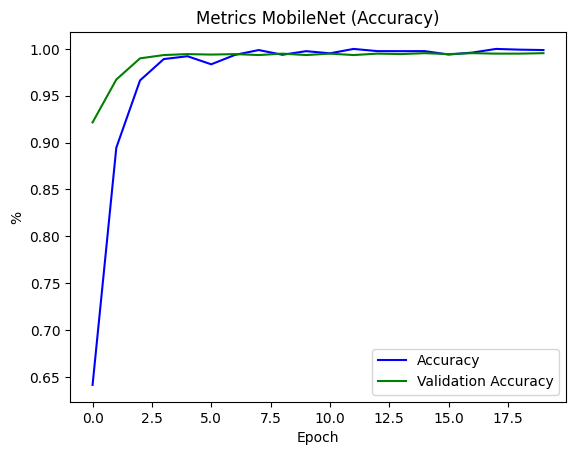

In [37]:
plt.plot(historym.history['accuracy'], color='blue', label='Accuracy')
plt.plot(historym.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.title('Metrics MobileNet (Accuracy)')
plt.ylabel('%')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

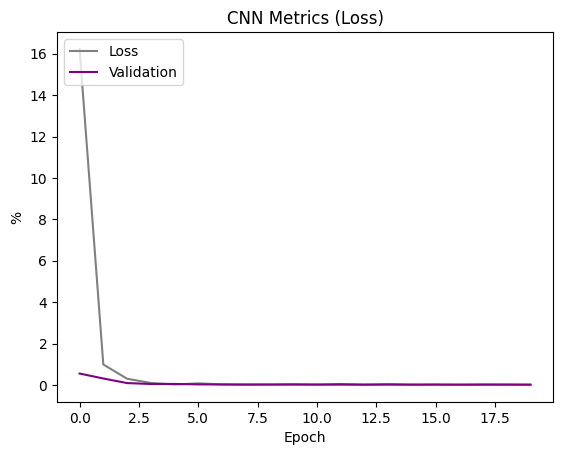

In [38]:
plt.plot(historym.history['loss'], color='grey', label='Loss')
plt.plot(historym.history['val_loss'], color='purple', label='Validation')
plt.title('CNN Metrics (Loss)')
plt.ylabel('%')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

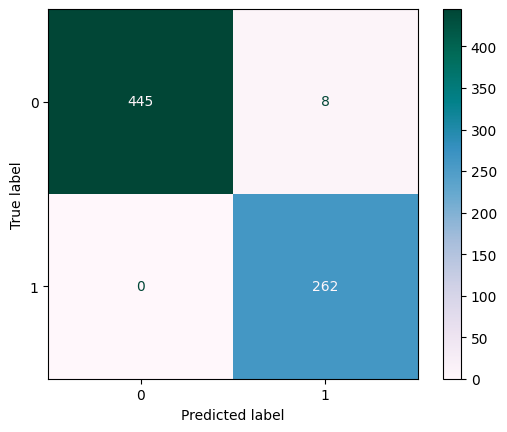

In [39]:
cnn = metrics.confusion_matrix(y_actual, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cnn)
disp.plot(cmap='PuBuGn')
plt.show()

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9823    0.9911       453
           1     0.9704    1.0000    0.9850       262

    accuracy                         0.9888       715
   macro avg     0.9852    0.9912    0.9880       715
weighted avg     0.9891    0.9888    0.9888       715



# ROC Curve

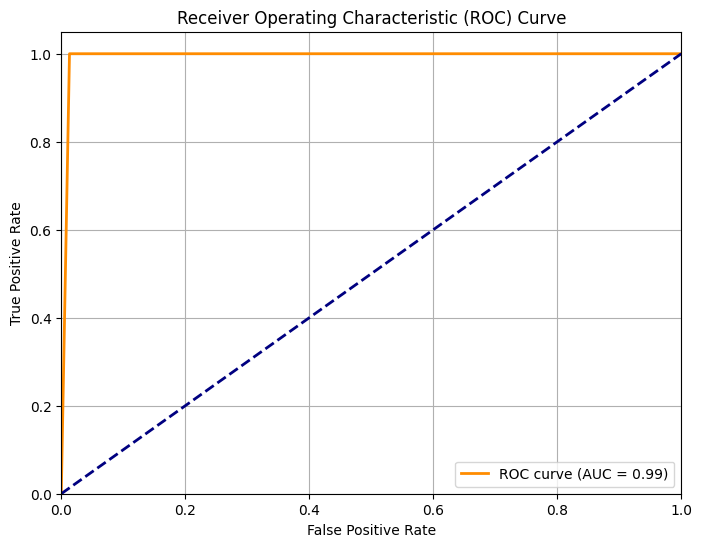

In [77]:
fpr, tpr, _ = roc_curve(y_actual, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ****ResNet50****

In [96]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20

train_dir = './casting_data/casting_data/casting_data/train'
test_dir = './casting_data/casting_data/casting_data/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers[:-30]: 
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),  # Moderate dropout
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=EPOCHS,
    callbacks=[early_stop]
)


Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.
Epoch 1/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 99s 379ms/step - accuracy: 0.6534 - loss: 0.5924 - val_accuracy: 0.7007 - val_loss: 1.1924
Epoch 2/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 70s 325ms/step - accuracy: 0.8311 - loss: 0.3680 - val_accuracy: 0.8140 - val_loss: 0.3708
Epoch 3/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 70s 325ms/step - accuracy: 0.8832 - loss: 0.2854 - val_accuracy: 0.5357 - val_loss: 2.2270
Epoch 4/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 69s 321ms/step - accuracy: 0.9130 - loss: 0.2254 - val_accuracy: 0.5217 - val_loss: 2.3102
Epoch 5/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 70s 325ms/step - accuracy: 0.9288 - loss: 0.1877 - val_accuracy: 0.7343 - val_loss: 0.7885
Epoch 6/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 69s 321ms/step - accuracy: 0.9390 - loss: 0.1698 - val_accuracy: 0.7063 - val_loss: 1.1084
Epoch 7/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 70s 323ms/step - accuracy: 0.9482 - loss: 0.1398 - val_accuracy: 0.9455 - val_loss: 0.1455


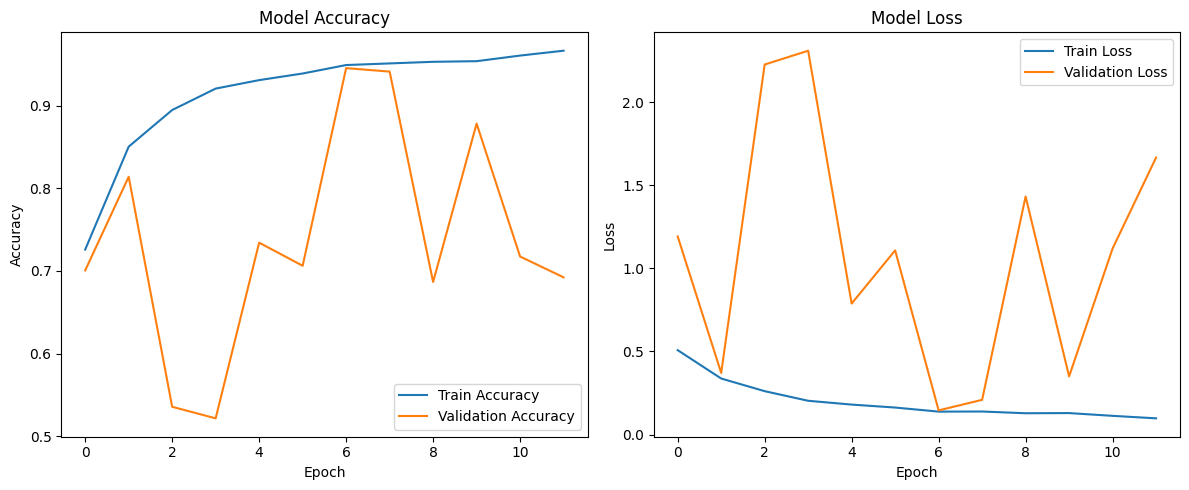

In [97]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step


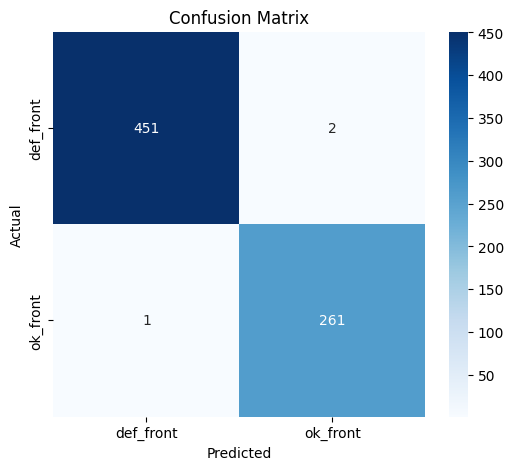

Classification Report:
              precision    recall  f1-score   support

   def_front       1.00      1.00      1.00       453
    ok_front       0.99      1.00      0.99       262

    accuracy                           1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715



In [98]:
# Predict on test set
y_pred = resnet_model.predict(test_data)
y_pred_classes = (y_pred >= 0.5).astype(int).reshape(-1)

# True labels
y_true = test_data.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_data.class_indices.keys()))


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step


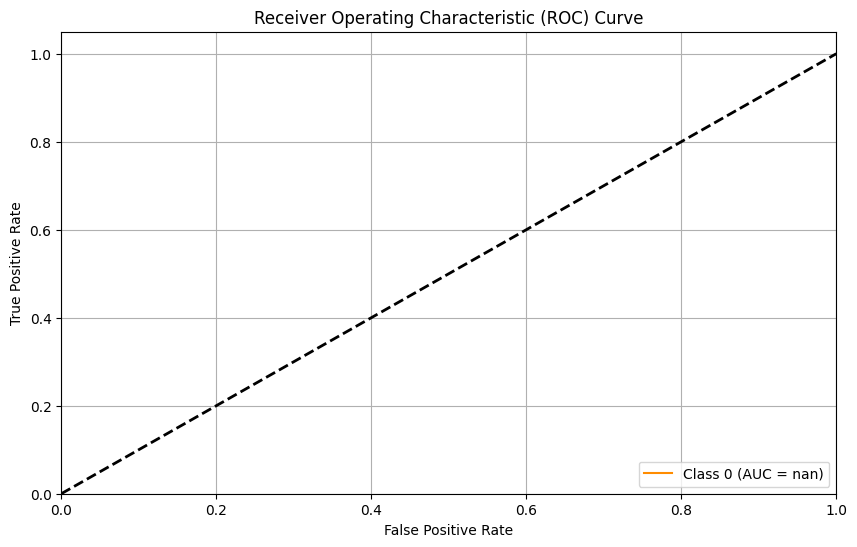

In [99]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get true labels
y_true = test_data.classes

# Step 2: Predict probabilities on the test set
y_probs = resnet_model.predict(test_data)  # shape: (num_samples, num_classes)

# Step 3: Binarize the labels (if 2 classes, it’s already fine)
n_classes = y_probs.shape[1]
y_true_binarized = label_binarize(y_true, classes=[i for i in range(n_classes)])

# Step 4: Plot ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 5: Plotting
plt.figure(figsize=(10, 6))
colors = ['darkorange', 'darkgreen', 'blue', 'red', 'purple']

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i % len(colors)],
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step


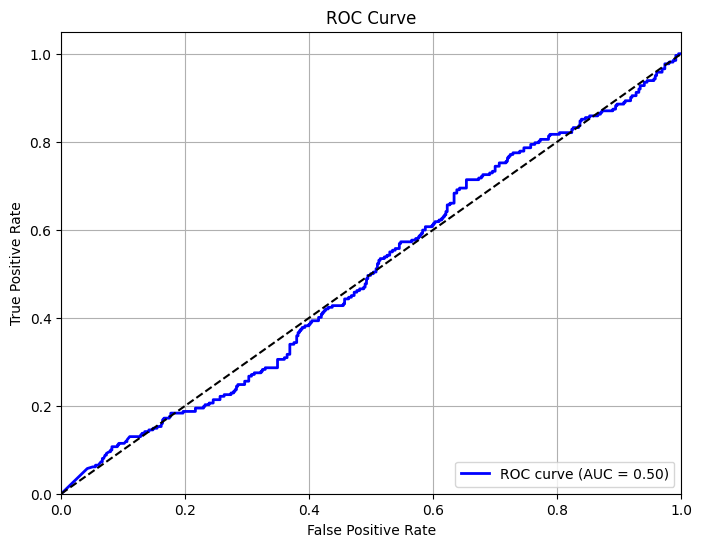

In [105]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get true labels
y_true = test_data.classes

# Get predicted probabilities
y_pred_prob = model.predict(test_data).ravel()[:len(y_true)]

# Compute ROC and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


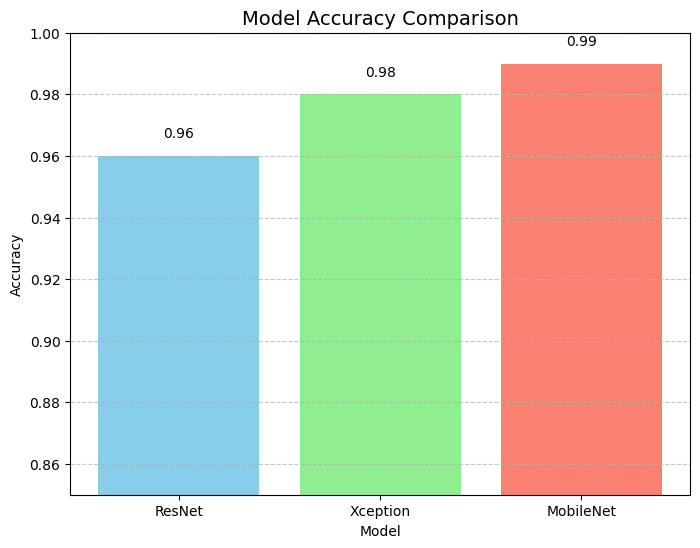

In [106]:
import matplotlib.pyplot as plt

model_names = ['ResNet', 'Xception', 'MobileNet']
accuracies = [0.96, 0.98, 0.99]  

plt.figure(figsize=(8,6))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim([0.85, 1.0])
plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.005, f'{height:.2f}', ha='center', va='bottom')

plt.show()
